# A simple engine for image searching: A SimilaritySearch.jl tutorial
by: Eric S. Téllez


## Installing packages
As usual, the first step consists on initializing the environment

In [1]:
using Pkg
pkg"activate ."
# pkg"add Printf MLDatasets LinearAlgebra Images StatsBase StatsPlots https://github.com/sadit/SimilaritySearch.jl"
using Printf, MLDatasets, MLDataUtils, LinearAlgebra, Images, StatsBase, StatsPlots, Statistics, SimilaritySearch


Activating environment at `~/Research/SimilaritySearch.jl/tutorials/Project.toml`


## Loading benchmarks
Here we use the [Fashion-MNIST](https://juliaml.github.io/MLDatasets.jl/latest/datasets/FashionMNIST/) dataset (loaded with MLDatasets) which is designed to be a drop-in replacement for the well known MNIST.

In [2]:
function load_data()
    train_X, train_y = FashionMNIST.traindata()
    test_X, test_y = FashionMNIST.testdata()
    
    #train_X, train_y = MNIST.traindata()
    #test_X, test_y = MNIST.testdata()
    (train_X=train_X, train_y=train_y, test_X=test_X, test_y=test_y)
end

D = load_data()
size(D.train_X), size(D.test_X), typeof(D.train_X)

((28, 28, 60000), (28, 28, 10000), Base.ReinterpretArray{Normed{UInt8,8},3,UInt8,Array{UInt8,3}})

## About preparing the data
While `SimilaritySearch.jl` works with several data types, we decide to convert data instead of writing a new distance function
to handle each image; also, it provides some speedup and reduces overflow problems on direct computation over the `MLDatasets.jl`'s numeric encoding for _MNIST_ and _Fashion-MNIST_.

In [3]:

vec(X, i) = Float32.(reshape(view(X, :, :, i), 28 * 28))
dist = l2_distance

#vec(X, i) = Float32.(reshape(view(X, :, :, i), 28 * 28)) |> normalize!
#dist = angle_distance

X = [vec(D.train_X, i) for i in 1:60000]
queries = [vec(D.test_X, i) for i in 1:10000]
eltype(X)

Array{Float32,1}

## Visualizing
The following functions will display images in the notebook

In [4]:
display_one(m) = display(Gray.(reshape(m, 28, 28))')
display_many(arr) = display(Gray.(hcat([reshape(m, 28, 28)' for m in arr]...)))


display_many (generic function with 1 method)

## Searching demos

The first demo is made with an exhaustive search; this algorithm is pretty simple but low performant; it is indicated whenever the construction time can't be amortized by the number of queries.

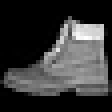

results (obj => dist): 42539 => 2.90, 38672 => 3.19, 40376 => 3.20, 8677 => 3.50, 19465 => 3.53, 43103 => 3.57, 30103 => 3.63, 41877 => 3.73, 36690 => 3.74, 15903 => 3.75, 31979 => 3.76, 20007 => 3.79, 50877 => 3.81, 30774 => 3.86, 39369 => 3.87

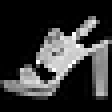

  0.085475 seconds (85.64 k allocations: 4.599 MiB, 11.66% gc time)
 

results (obj => dist): 36510 => 3.43, 33132 => 5.99, 1881 => 6.01, 44293 => 6.04, 52516 => 6.47, 34691 => 6.48, 14568 => 6.57, 5899 => 6.58, 27173 => 6.58, 16924 => 6.60, 20650 => 6.61, 4898 => 6.64, 28196 => 6.71, 37855 => 6.73, 3031 => 6.77

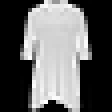

results (obj => dist): 25058 => 1.94, 10207 => 4.36, 55769 => 4.50, 4445 => 4.57, 27081 => 4.68, 18231 => 4.69, 34066 => 4.77, 37117 => 4.78, 33820 => 4.78, 14979 => 4.79, 20391 => 4.80, 42734 => 4.83, 13358 => 4.90, 14563 => 4.95, 7916 => 4.99

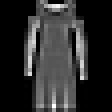

results (obj => dist): 31996 => 2.98, 57795 => 3.10, 42339 => 3.46, 44304 => 3.65, 33204 => 3.66, 53573 => 3.73, 49608 => 3.79, 44455 => 3.90, 41559 => 3.94, 12072 => 4.01, 45322 => 4.02, 24072 => 4.06, 38871 => 4.10, 34346 => 4.13, 31884 => 4.13

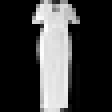

 0.025114 seconds (3 allocations: 368 bytes)
  0.030472 seconds (3 allocations: 368 bytes)
  0.027025 seconds (3 allocations: 368 bytes)


results (obj => dist): 24897 => 3.35, 35363 => 3.63, 32087 => 3.77, 6134 => 3.87, 54447 => 3.90, 28109 => 3.99, 40926 => 4.02, 36185 => 4.09, 44214 => 4.09, 36540 => 4.09, 30269 => 4.10, 454 => 4.12, 50933 => 4.13, 33885 => 4.15, 55481 => 4.16

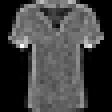

results (obj => dist): 5330 => 2.85, 39574 => 2.90, 34130 => 3.03, 59412 => 3.28, 48105 => 3.33, 23973 => 3.39, 28956 => 3.47, 31265 => 3.51, 39109 => 3.53, 32595 => 3.56, 39320 => 3.59, 47336 => 3.60, 39797 => 3.63, 5354 => 3.68, 50129 => 3.69

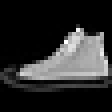

results (obj => dist): 50871 => 3.21, 1967 => 3.25, 26873 => 3.26, 19945 => 3.33, 58109 => 3.35, 26350 => 3.40, 55535 => 3.41, 24565 => 3.44, 10628 => 3.45, 26348 => 3.47, 1817 => 3.49, 24320 => 3.52, 29843 => 3.57, 36345 => 3.58, 55799 => 3.59

  0.026505 seconds (3 allocations: 368 bytes)
  0.030865 seconds (3 allocations: 368 bytes)
  0.025871 seconds (3 allocations: 368 bytes)


In [5]:

function sequential_search_demo()
    index = fit(Sequential, X)

    for q in rand(queries, 7)
        display_one(q)
        @time res = search(index, l2_distance, q, KnnResult(15))
        display_many([X[p.objID] for p in res])
        msg = [(@sprintf "%d => %0.2f" p.objID p.dist) for p in res]
        display("text/html", "results (obj => dist): " * join(msg, ", "))
    end
    
    index
end

seq = sequential_search_demo();

## Searching with faster indexes
Fast exact indexes can be created using metric division strategies, but the faster ones some times are designed to retrieve an approximation of the solution. In any case, indexes for fast similarity search need to amortize the construction cost with a large number of queries. The following functions only exemplify the searching process, however, the number of queries is too small to show the typical case of use of these indexes.

## Experiments with a K-Nearest References index (Knr)

The `Knr` is a simple but effective index that allows fast searching in high dimensional datasets.

Knr> refs=Array{Array{Float32,1},1}, k=3, numrefs=128, dist=l2_distance
Knr> advance 0.05, now: 2019-11-15T13:36:52.178
Knr> advance 0.1, now: 2019-11-15T13:36:52.285
Knr> advance 0.15, now: 2019-11-15T13:36:52.363
Knr> advance 0.2, now: 2019-11-15T13:36:52.447
Knr> advance 0.25, now: 2019-11-15T13:36:52.524
Knr> advance 0.3, now: 2019-11-15T13:36:52.612
Knr> advance 0.35, now: 2019-11-15T13:36:52.688
Knr> advance 0.4, now: 2019-11-15T13:36:52.772
Knr> advance 0.45, now: 2019-11-15T13:36:52.849
Knr> advance 0.5, now: 2019-11-15T13:36:52.933
Knr> advance 0.55, now: 2019-11-15T13:36:53.01
Knr> advance 0.6, now: 2019-11-15T13:36:53.097
Knr> advance 0.65, now: 2019-11-15T13:36:53.177
Knr> advance 0.7, now: 2019-11-15T13:36:53.262
Knr> advance 0.75, now: 2019-11-15T13:36:53.34
Knr> advance 0.8, now: 2019-11-15T13:36:53.425
Knr> advance 0.85, now: 2019-11-15T13:36:53.504
Knr> advance 0.9, now: 2019-11-15T13:36:53.591


  2.033338 seconds (868.27 k allocations: 49.769 MiB, 1.23% gc time)


Knr> advance 0.95, now: 2019-11-15T13:36:53.668
Knr> advance 1.0, now: 2019-11-15T13:36:53.755
Knr> optimizing index for recall=0.95
Knr> opt step ksearch=2, performance PerformanceResult(0.9305555555555551, 0.9305555555555551, 0.9305555555555551, 0.0023026764392852783, 0.018924446776509285, 3096.2421875, 4785.647718250856)


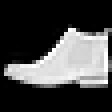

results (obj => dist): 6105 => 2.74, 6423 => 3.01, 2547 => 3.06, 46151 => 3.15, 36065 => 3.23, 22973 => 3.28, 3322 => 3.40, 35811 => 3.42, 42965 => 3.43, 31044 => 3.44, 59766 => 3.49, 35512 => 3.52, 7157 => 3.58, 51200 => 3.67, 10919 => 3.72

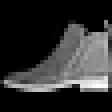

results (obj => dist): 36486 => 2.67, 41922 => 2.74, 44066 => 3.02, 37216 => 3.02, 46540 => 3.07, 22250 => 3.14, 18532 => 3.25, 41634 => 3.39, 27066 => 3.40, 7632 => 3.52, 44192 => 3.67, 43245 => 3.74, 13879 => 3.75, 11856 => 3.78, 15559 => 3.79

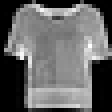

results (obj => dist): 14624 => 5.10, 50993 => 5.13, 24435 => 5.16, 43782 => 5.16, 42040 => 5.18, 23059 => 5.39, 49573 => 5.41, 52398 => 5.48, 47776 => 5.51, 2713 => 5.52, 826 => 5.53, 37668 => 5.53, 6473 => 5.54, 12955 => 5.55, 3337 => 5.61

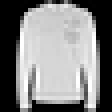

  0.034611 seconds (24.27 k allocations: 1.314 MiB)
  0.002719 seconds (9 allocations: 117.828 KiB)
  0.003707 seconds (9 allocations: 117.828 KiB)


Knr> reached performance PerformanceResult(0.9852430555555555, 0.9852430555555555, 0.9852430555555555, 0.0032266825437545776, 0.018924446776509285, 5151.59375, 4769.640851845704)


results (obj => dist): 38046 => 2.57, 19863 => 2.61, 7874 => 2.76, 8558 => 2.79, 24516 => 2.87, 34340 => 2.88, 24557 => 2.90, 55171 => 2.91, 20110 => 2.92, 54673 => 2.94, 39615 => 2.95, 47668 => 3.11, 54021 => 3.14, 1634 => 3.14, 59579 => 3.15

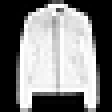

results (obj => dist): 8654 => 2.94, 46619 => 3.03, 35111 => 3.33, 39683 => 3.37, 7745 => 3.46, 20546 => 3.50, 28617 => 3.52, 45072 => 3.72, 10664 => 3.74, 17420 => 3.93, 12492 => 4.00, 38593 => 4.00, 20059 => 4.00, 46518 => 4.00, 55218 => 4.08

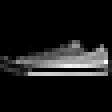

results (obj => dist): 27256 => 2.48, 47443 => 2.57, 17799 => 2.83, 17860 => 3.09, 38264 => 3.12, 49277 => 3.15, 6315 => 3.25, 59695 => 3.37, 24509 => 3.66, 12262 => 3.67, 42046 => 3.69, 54001 => 3.69, 50030 => 3.71, 8293 => 3.75, 48518 => 3.76

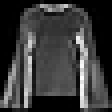

results (obj => dist): 45692 => 3.81, 24324 => 4.84, 49933 => 4.86, 990 => 4.95, 23313 => 4.98, 56565 => 4.99, 10047 => 5.00, 841 => 5.01, 4694 => 5.09, 25387 => 5.11, 44034 => 5.13, 36704 => 5.13, 34455 => 5.15, 25700 => 5.16, 22724 => 5.19

  0.003479 seconds (9 allocations: 117.828 KiB)
  0.002877 seconds (9 allocations: 117.828 KiB)
  0.009859 seconds (9 allocations: 117.828 KiB)
  0.006909 seconds (9 allocations: 117.828 KiB)


In [6]:
function knr_search_demo()
    @time index = fit(Knr, l2_distance, X, numrefs=128, verbose=true)
    # we can optimize the index to achieve a desired quality (trading with search time)
    optimize!(index, dist, recall=0.95)
    
    for q in rand(queries, 7)
        display_one(q)
        @time res = search(index, l2_distance, q, KnnResult(15))
        display_many([X[p.objID] for p in res])
        msg = [(@sprintf "%d => %0.2f" p.objID p.dist) for p in res]
        display("text/html", "results (obj => dist): " * join(msg, ", "))
    end
    
    index
end

knr = knr_search_demo();

## Solving queries with a proximity search graph
The `SearchGraph` is a faster index but with a more expensive construction.

==== BEGIN Opt. BeamSearch, expected recall: 0.9, n: 9
  == Begin Opt. BeamSearch iteration: 1, expected recall: 0.9, n: 9
    ** Opt. BeamSearch. A new best conf was found> score: 0.65625, conf: {"ssize":1,"bsize":4}, perf: {"precision":null,"recall":0.65625,"f1":null,"seconds":3.520399332046509e-6,"exhaustive_search_seconds":2.4605542421340942e-6,"evaluations":7.734375,"distances_sum":7886.758755281844}, best_list's length: 3, n: 9
  == End Opt. BeamSearch. Iteration finished; {"score":0.65625,"state":{"ssize":1,"bsize":4},"perf":{"precision":null,"recall":0.65625,"f1":null,"seconds":3.520399332046509e-6,"exhaustive_search_seconds":2.4605542421340942e-6,"evaluations":7.734375,"distances_sum":7886.758755281844}}, beam: 3, n: 9
  == Begin Opt. BeamSearch iteration: 2, expected recall: 0.9, n: 9
    ** Opt. BeamSearch. A new best conf was found> score: 0.875, conf: {"ssize":4,"bsize":7}, perf: {"precision":1.0,"recall":0.875,"f1":0.925346528471529,"seconds":4.090368747711182e-6,"exhaust

 18.499437 seconds (20.76 M allocations: 2.136 GiB, 3.48% gc time)


added n=60000, neighborhood=3, 2019-11-15T13:37:16.845
==== BEGIN Opt. BeamSearch, expected recall: 0.95, n: 60000
  == Begin Opt. BeamSearch iteration: 1, expected recall: 0.95, n: 60000
    ** Opt. BeamSearch. A new best conf was found> score: 0.9383680555555552, conf: {"ssize":1,"bsize":19}, perf: {"precision":0.9383680555555552,"recall":0.9383680555555552,"f1":null,"seconds":0.00035231560468673706,"exhaustive_search_seconds":0.019018232822418213,"evaluations":419.3359375,"distances_sum":4535.887809125562}, best_list's length: 2, n: 60000
    ** Opt. BeamSearch. A new best conf was found> score: 0.9010416666666661, conf: {"ssize":1,"bsize":10}, perf: {"precision":0.9010416666666661,"recall":0.9010416666666661,"f1":null,"seconds":0.0002601742744445801,"exhaustive_search_seconds":0.019018232822418213,"evaluations":341.5546875,"distances_sum":4549.351371452397}, best_list's length: 3, n: 60000
    ** Opt. BeamSearch. A new best conf was found> score: 0.9045138888888883, conf: {"ssize":

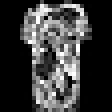

results (obj => dist): 41620 => 5.80, 9411 => 5.86, 12938 => 5.92, 32618 => 5.94, 6893 => 5.95, 24742 => 5.97, 47572 => 5.97, 32474 => 5.97, 28739 => 6.00, 51088 => 6.00, 54864 => 6.00, 20193 => 6.01, 52195 => 6.04, 18408 => 6.07, 39595 => 6.08

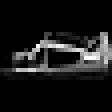

results (obj => dist): 3574 => 4.27, 13280 => 4.43, 5364 => 4.43, 17091 => 4.72, 11513 => 4.73, 33155 => 4.75, 9568 => 4.80, 39925 => 4.80, 28288 => 4.81, 8511 => 4.81, 49048 => 4.83, 46727 => 4.83, 9695 => 4.83, 927 => 4.83, 21001 => 4.85

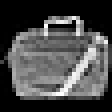

results (obj => dist): 33864 => 5.90, 9467 => 5.97, 57444 => 5.98, 27586 => 6.00, 10885 => 6.06, 23864 => 6.15, 29559 => 6.18, 40663 => 6.23, 16059 => 6.26, 32360 => 6.27, 40369 => 6.27, 37298 => 6.28, 56609 => 6.30, 58839 => 6.31, 33582 => 6.32

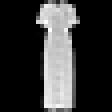

results (obj => dist): 57723 => 2.08, 46955 => 2.94, 21093 => 3.04, 49385 => 3.07, 26320 => 3.13, 29180 => 3.15, 17818 => 3.26, 18197 => 3.34, 5785 => 3.35, 28576 => 3.35, 44737 => 3.37, 36795 => 3.42, 10430 => 3.43, 49200 => 3.43, 4748 => 3.43

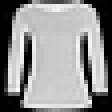

results (obj => dist): 3926 => 4.50, 59982 => 5.06, 14849 => 5.56, 24744 => 5.56, 423 => 5.67, 22372 => 5.69, 49035 => 5.69, 44310 => 5.72, 36055 => 5.73, 47538 => 5.80, 29198 => 5.81, 37993 => 5.83, 26274 => 5.90, 23755 => 5.91, 29808 => 5.92

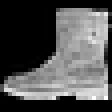

results (obj => dist): 37543 => 3.56, 16063 => 3.71, 18893 => 3.87, 12929 => 3.88, 2900 => 4.25, 59220 => 4.28, 51926 => 4.32, 609 => 4.36, 25627 => 4.39, 8096 => 4.40, 41118 => 4.45, 33824 => 4.46, 27126 => 4.47, 33101 => 4.48, 34824 => 4.48

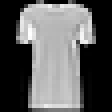

  0.000474 seconds (20 allocations: 19.625 KiB)
  0.000744 seconds (24 allocations: 72.016 KiB)
  0.000508 seconds (20 allocations: 19.625 KiB)
  0.000307 seconds (20 allocations: 19.625 KiB)
  0.000594 seconds (20 allocations: 19.625 KiB)
  0.001166 seconds (20 allocations: 19.625 KiB)


  == End Opt. BeamSearch. Iteration finished; {"score":146.88557100524275,"state":{"ssize":1,"bsize":18},"perf":{"precision":0.952256944444444,"recall":0.952256944444444,"f1":0.952256944444444,"seconds":0.0003203507512807846,"exhaustive_search_seconds":0.019018232822418213,"evaluations":411.28125,"distances_sum":4532.589951975846}}, beam: 4, n: 60000
==== END Opt. BeamSearch. Finished, best: {"score":146.88557100524275,"state":{"ssize":1,"bsize":18},"perf":{"precision":0.952256944444444,"recall":0.952256944444444,"f1":0.952256944444444,"seconds":0.0003203507512807846,"exhaustive_search_seconds":0.019018232822418213,"evaluations":411.28125,"distances_sum":4532.589951975846}}, n: 60000


results (obj => dist): 58225 => 1.91, 17431 => 2.60, 11531 => 2.75, 1990 => 2.80, 32004 => 2.83, 13949 => 2.85, 6000 => 2.86, 20577 => 2.88, 44020 => 2.91, 830 => 2.94, 8109 => 2.98, 38540 => 3.03, 8105 => 3.05, 48922 => 3.05, 43135 => 3.05

  0.000433 seconds (20 allocations: 19.625 KiB)


In [7]:
function searchgraph_search_demo()
    # a real index only works whenever the number of queries amortizes the construction cost
    @time index = fit(SearchGraph, l2_distance, X, verbose=true)
    optimize!(index, l2_distance, recall=0.95)
    for q in rand(queries, 7)
        display_one(q)
        @time res = search(index, l2_distance, q, KnnResult(15))
        display_many([X[p.objID] for p in res])
        msg = [(@sprintf "%d => %0.2f" p.objID p.dist) for p in res]
        display("text/html", "results (obj => dist): " * join(msg, ", "))
    end
    
    index
end

sgraph = searchgraph_search_demo();

## A simple NN classifier
Lets create a classifier to measure the performance and the quality impact of the different indexes

In [8]:
function classify(index, train_y, queries, test_y)
    ypred = []
    for i in eachindex(queries)
        res = search(index, l2_distance, queries[i], KnnResult(1))
        push!(ypred, train_y[first(res).objID])
    end
    
    println("NN-classifier $(typeof(index)) accuracy:", mean(ypred .== test_y))
end


classify (generic function with 1 method)

In [9]:
@time classify(seq, D.train_y, queries, D.test_y)
@time classify(knr, D.train_y, queries, D.test_y)
@time classify(sgraph, D.train_y, queries, D.test_y)

NN-classifier Sequential{Array{Float32,1}} accuracy:0.8497
191.872072 seconds (453.65 k allocations: 23.252 MiB, 0.01% gc time)
NN-classifier Knr{Array{Float32,1}} accuracy:0.8481
 33.713900 seconds (157.68 k allocations: 1.125 GiB, 0.73% gc time)
NN-classifier SearchGraph{Array{Float32,1}} accuracy:0.8421
  3.563560 seconds (271.25 k allocations: 237.358 MiB, 0.94% gc time)
